In [4]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2607 - acc: 0.9246
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1044 - acc: 0.9681
Epoch 3/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0684 - acc: 0.9786
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.0492 - acc: 0.9852
Epoch 5/5
10000/10000 [==============================] - 0s 34us/step
test_acc: 0.9819


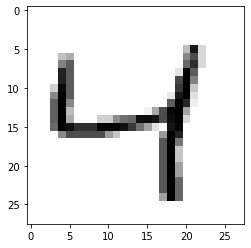

4

In [12]:
digit = train_images[2].reshape((28, 28))
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

import numpy as np
np.argmax(train_labels[2])

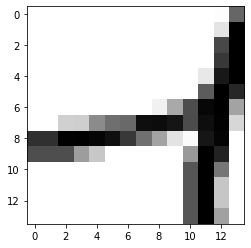

In [15]:
my_slice = digit[7:-7, 7:-7]
plt.imshow(my_slice, cmap=plt.cm.binary)
plt.show()

In [17]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

naive_relu(np.array([[-1., -2.], [3., -4.]]))

array([[0., 0.],
       [3., 0.]])

In [21]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

In [25]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

naive_vector_dot(np.array([-1., -2.]), np.array([3., -4.]))

5.0

In [30]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            z[i, j] = naive_vector_dot(x[i], y[:, j])
    return z

naive_matrix_dot(np.array([[-1., -2., -3.], [-4., -5., -6.]]), np.array([[6., 5.], [4., 3], [2., 1.]]))

array([[-20., -14.],
       [-56., -41.]])